In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter   #가우시안 필터 
from skimage import data  #데이터 임포트
from skimage import img_as_float  
from skimage.morphology import reconstruction #재구성함수임포트


image = img_as_float(data.coins()) #이미지를 [0, 1]의 값을 사용하여 부동 소수점 형식으로 변환
image = gaussian_filter(image, 1) #가우시안 필터 적용

seed = np.copy(image)            #시드  이미지생성
seed[1:-1, 1:-1] = image.min()   #이시드 이미지를 이미지의 최소 강도로 초기화
mask = image                     #테두리를 원본 이미지의 픽셀 값으로 설정
dilated = reconstruction(seed, mask, method='dilation')
#팽창reconstruction은 밝은 영역을 확대하고 어두운 영역을 축소


#### 가우시안 필터 gaussian_filter
- 중앙값만 도드라지게 보고 주변은 잘안보이게 하는 마스킹의 형태로 스무스하게 만들어줌

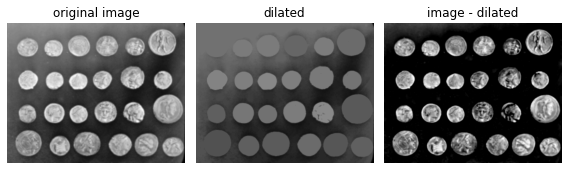

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')  #원본이미지
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray') #팽창이미지
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')  
#원본이미지에서 팽창된 이미지를 빼면 아래와 같이 동전과 평평한 검정색 배경만 있는 이미지가 남음
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

In [3]:
#dilated된 이미지의 밝기를 올리기 위해 진행
h = 0.4 #0(투명)과 1(불투명) 사이의 알파 혼합 값
seed = image - h  #시드값 알파값을빼 더욱밝게 만든다
dilated = reconstruction(seed, mask, method='dilation') 
hdome = image - dilated

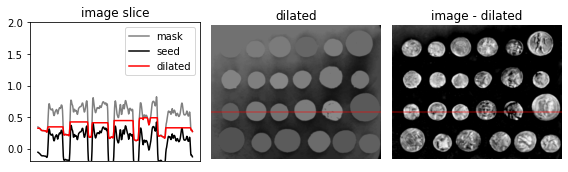

In [22]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 197

#이미지의 음영을 나타내줌
ax0.plot(mask[yslice], '0.5', label='mask') #mask의 이미지음영
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.2, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
                    ####다루는 데이터 범위를 정의#####
ax1.axhline(yslice, color='r', alpha=0.4)
                                
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()